# <font color = "red"> Pair programming steps: 
<img src="files/pair_programming.png" width="150" height="150">


# <font color = "red"> Pair programming tasks: 
- Create a Pandas DataFrame from Lists
- Draw a scatter plot
- Implement linear regression
- Fit a linear regression model based on sklearn library 
- Draw a scatter plot with regression line

## <font color = "brown">After completing the comment line, please click the "Save" button.

# <font color = "blue">Part 1: Create a Pandas DataFrame from Lists
- independent variable (x) - weightlifting hour 
- dependent variable (y) - score points 

In [1]:
x = [1,2,3,4,5]
y = [2,4,5,4,5]

### Part 1.1: import library (driver-Michael, navigator-Alex)

In [2]:
import pandas as pd

### Part 1.2: Create a Pandas DataFrame with a column name 'weightlifting hour' from the list x (driver-Alex, navigator-Michael)
- function: DataFrame(data, columns=['...']) 

In [3]:
df_x = pd.DataFrame(x, columns = ['weightlifting hour']) 
df_x

weightlifting hour
0                   1
1                   2
2                   3
3                   4
4                   5

### Part 1.3: show the first two rows of the dataframe  (driver-Michael, navigator-Alex)
- function: head()

In [4]:
df_x.head(2)

weightlifting hour
0                   1
1                   2

### Part 1.4: Convert the list x and list y to a list of points(with x and y axis) (driver-Alex, navigator-Michael)

In [5]:
xy = list(zip(x,y))
print(xy)

[(1, 2), (2, 4), (3, 5), (4, 4), (5, 5)]


### Part 1.5: Create a Pandas DataFrame with column names('weightlifting hour' and 'score points') from a list of points (driver-Michael, navigator-Alex)

In [6]:
df_xy = pd.DataFrame(xy, columns = ['weightlifting hour','score points'] )
df_xy.head(5)

weightlifting hour  score points
0                   1             2
1                   2             4
2                   3             5
3                   4             4
4                   5             5

# <font color = "blue">Part 2: Draw a scatter plot 

### Part 2.1: import library 

In [7]:
import matplotlib.pyplot as plt

### Part 2.2: extract the column 'weightlifting hour' from the dataframe 

In [8]:
weightlifting_hour = df_xy['weightlifting hour']
print(type(weightlifting_hour))
print(weightlifting_hour)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
4    5
Name: weightlifting hour, dtype: int64


### Part 2.3: extract the column 'score points' from the dataframe 

In [9]:
score_points = df_xy['score points']
print(type(score_points))
print(score_points)

<class 'pandas.core.series.Series'>
0    2
1    4
2    5
3    4
4    5
Name: score points, dtype: int64


### Part 2.4: draw a scatter plot based on weightlifting_hour and  score_points
- function: 
    - scatter(x,y,s,c,marker)
    - title()
    - xlabel() 
    - ylable()
    - xlim([start, end])
    - ylim([start, end])

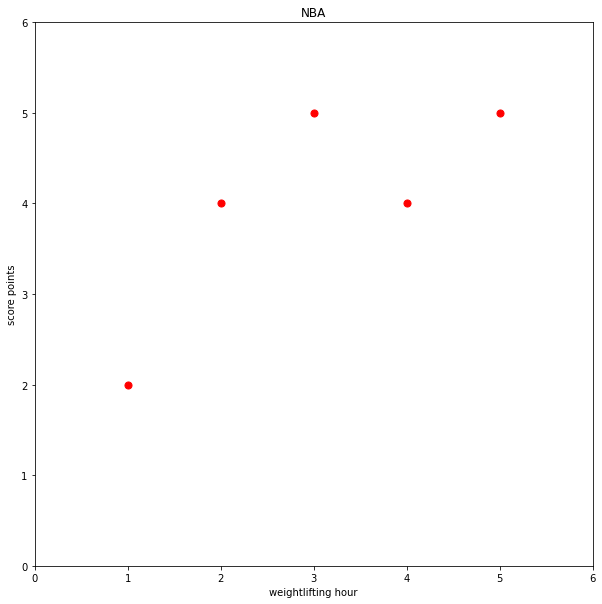

In [10]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(weightlifting_hour, score_points, s=50,c='red',marker='o')
plt.title("NBA")
plt.xlabel("weightlifting hour")
plt.ylabel("score points")
plt.xlim([0,6])
plt.ylim([0,6])
plt.show()

# <font color = "blue">Part 3: Implement linear regression

$\hat{y} = b_0 + b_1x$

$b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$

$b_0 = \bar{y} - b_1\bar{x}$

### Part 3.1: import library 

In [11]:
import numpy as np

### Part 3.2: calculate slope $b_1$
$b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$

In [12]:
X = weightlifting_hour
print(type(X))
print(X)
Y = score_points

X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
b1 = num / den

print("The slope is: ", b1)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
4    5
Name: weightlifting hour, dtype: int64
The slope is:  0.6


### Part 3.3: calculate y-intercept $b_0$
$b_0 = \bar{y} - b_1\bar{x}$

In [13]:
b0 = Y_mean - b1*X_mean
print("The y-intercept is: ",b0)

The y-intercept is:  2.2


# <font color = "blue">Part 4: compare manually calculated results with results based on the sklearn library

- function: 
    * fit(X, y): fit the linear regression model 
        * X: {array-like, sparse matrix} of shape (n_samples, n_features)
        * y: array-like of shape (n_samples,)
    * coef_: get the coefficient(slope)
    * intercept_: get intercept 
    * reshape(n_samples,n_features): reshape an array to a matrix

### Part 4.1: import library 

In [14]:
from sklearn.linear_model import LinearRegression

### Part 4.2: convert a list to a matrix  
- function: reshape(n_samples,n_features)

In [15]:
print(type(X))
print(len(X))
print(X)

<class 'pandas.core.series.Series'>
5
0    1
1    2
2    3
3    4
4    5
Name: weightlifting hour, dtype: int64


In [16]:
print(type(np.array(X)))
print(np.array(X).shape)
print(np.array(X))

<class 'numpy.ndarray'>
(5,)
[1 2 3 4 5]


In [17]:
print(type(np.array(X).reshape(5, 1)))
print(np.array(X).reshape(5, 1).shape)
print(np.array(X).reshape(5, 1))

<class 'numpy.ndarray'>
(5, 1)
[[1]
 [2]
 [3]
 [4]
 [5]]


### Part 4.3: fit a linear regression model

In [18]:
reg = LinearRegression().fit(np.array(X).reshape(5, 1), Y)
print(reg.coef_)
print(reg.intercept_)

[0.6]
2.2


# <font color = "blue">Part 5: Draw a scatter plot with regression line

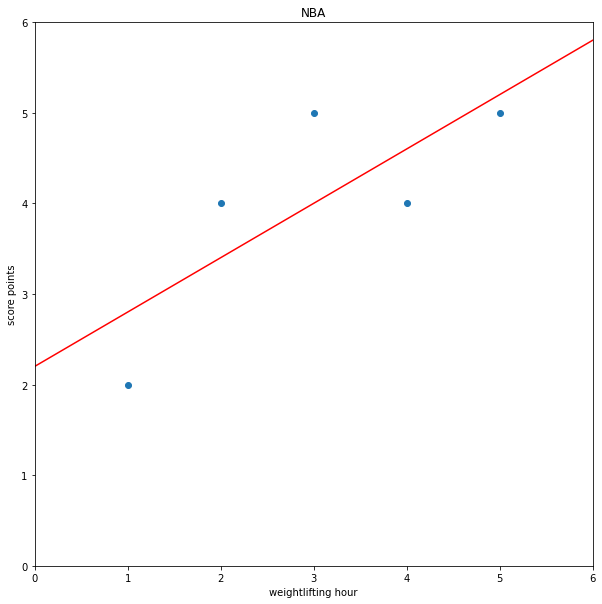

In [19]:
plt.rcParams['figure.figsize'] = (10, 10)

X_new = [0,6]
Y_pred = [b0 + b1*x for x in X_new]

plt.scatter(X, Y)
plt.plot(X_new, Y_pred, color='red')
plt.title("NBA")
plt.xlabel("weightlifting hour")
plt.ylabel("score points")
plt.xlim([0,6])
plt.ylim([0,6])
plt.show()